# <center>Digital Image Processing - Problem Set 3</center>

### Student Names: Jorge Aguilar, Jorge Díaz, Jorge Lambraño

### Instructions

This Problem Set covers the topics of frequency domain filtering and color image processing.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

### Problem 1

Visualize the Fourier spectrum of an image. Write a function that visualizes the spectrum of an input gray-scale image. The function should perform the following steps:

1. Compute the FFT of the input image using the FFT function <tt>numpy.fft.fft2</tt>.
2. Shift the transform to center the origin in the middle of the image using <tt>numpy.fft.fftshift</tt>.
3. The Fourier transform contains complex numbers, so we usually analyze its phase and spectrum components. Write commands that compute the Fourier spectrum from the shifted Fourier transform.
4. The resulting spectrum is difficult to visualize if plotted directly. Instead, we usually apply a logarithmic intensity transform to the spectrum before visualizing. Use the <tt>numpy.log</tt> function to accomplish this.
5. Plot the modified spectrum.

Test your function by applying it to the images <tt>face.png</tt>, <tt>blown_ic.png</tt>, <tt>test_pattern_blurring_orig.png</tt>, <tt>translated_rectangle.png</tt> and <tt>rectangle.png</tt>.

Please comment your results.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline

In [2]:
# import sys
# np.set_printoptions(threshold=sys.maxsize)

In [3]:
# problem_1.py
#-------------------------------------------------------------------------------
def plot_image(image, title):
    plt.imshow(image, cmap = 'gray')
    plt.title(title)
    plt.axis('off')

In [4]:
#-------------------------------------------------------------------------------
def gamma_image(imagen, gamma):
    imagen_out = 1 * np.power(imagen/255.0, 0.2)
    return (imagen_out*255).astype('int')

In [5]:
#-------------------------------------------------------------------------------
def log_image(image):
    return 20 * np.log(np.abs(image + 1))

In [6]:
#-------------------------------------------------------------------------------
def fourier_image(image):
    fft_image = np.fft.fft2(image)
    shift_fft = np.fft.fftshift(fft_image)
    return shift_fft

In [7]:
#-------------------------------------------------------------------------------
def process_1(filename):
    # define a figure
    fig = plt.figure(figsize = (12,12))
    # load image
    image = cv2.imread('files/' + filename, cv2.cv2.IMREAD_GRAYSCALE)
    # display original image 
    plt.subplot(1, 2, 1)
    plot_image(image, 'Original image')
    # compute fourier image
    fft_image = fourier_image(image)
    # use a logaritmic transformation
    log_correction = log_image(fft_image)
    # display gamma image 
    plt.subplot(1, 2, 2)
    plot_image(log_correction, 'Spectrum image')
    # display title on figure
    #plt.suptitle('Image: ' + filename, fontsize = 16) 

In [8]:
#-------------------------------------------------------------------------------
def main1():
    image_names = ['face.png', 'blown_ic.png', 'test_pattern_blurring_orig.png', 
                   'translated_rectangle.png', 'rectangle.png']
    for filename in image_names:
        process_1(filename)
    plt.show()

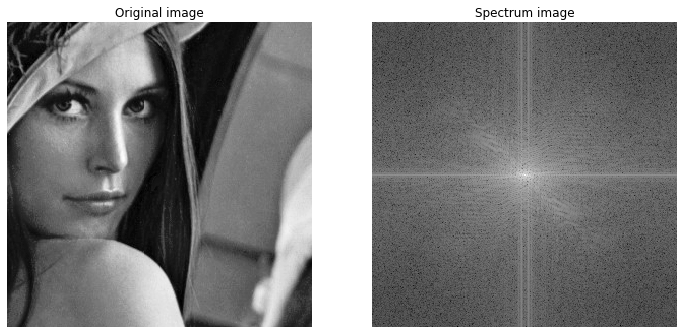

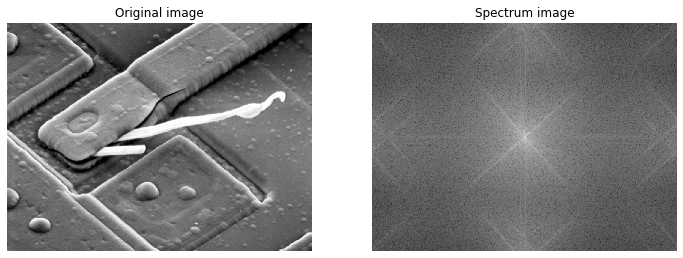

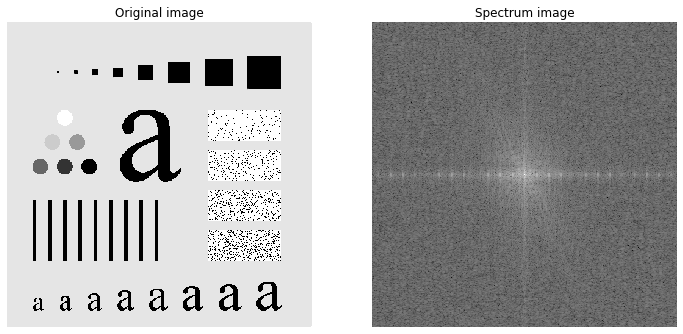

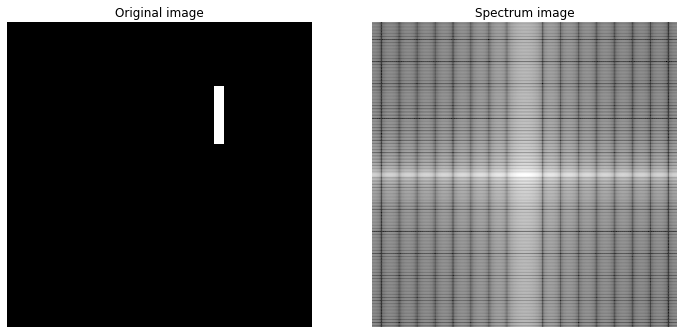

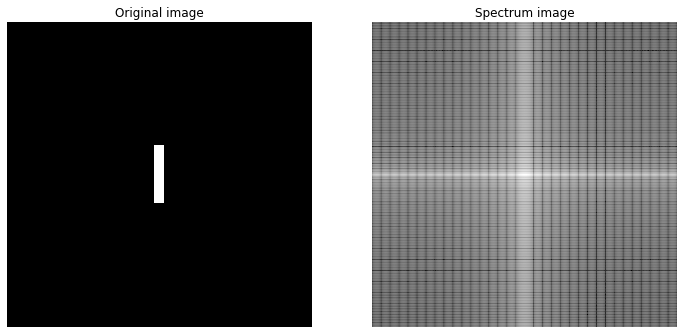

In [9]:
#-------------------------------------------------------------------------------
main1()

### Result
With this code it's possible to obtain the spectrum of a image. Using function **fourier_image()** we get the shifted fourier transform of any image, after this we need to plot the magnitude of the spectrum. Due to could be difficult to visualize all values of the spectrum, it's applied a logaritmit conversion to any value of the array. In this conversion, each value is added the value 1 in order to advoid the value 0 inside the logarithm.

### Problem 2

Frequency domain filtering. Write a PYTHON function that performs high-frequency emphasis (hfe) filtering. Recall that an hfe filter is defined as:
\begin{equation}
H_{hfe}(u,v) = a + b \cdot H_{hp}(u,v)
\end{equation}
where $a$ is the offset, $b$ is the high-frequency amplification and $H_{hp}$ is the transfer function of a high-pass filter. Your function should be based on a second-order high-pass Butterworth filter with a cut-off frequency $D_0$, which is given by:
\begin{equation}
H_{hp}(u,v) = \frac{1}{1 + \left[\frac{D_0}{D(u,v)}\right]^{2n}}.
\end{equation}
<b>Note. </b> $D(u,v)$ measures the Euclidean distance from the point $(u,v)$ to the center of the frequency plane.

Use your function and filters on the image <tt>chest.jpg</tt> to reproduce the image enhancement illustrated below.

<img src="files/chest.jpg" width=200> <img src="files/out.png" width=200>

The outline of the process is the following:

1. Create a high-pass Butterworth filter with a frequency domain dimension of 2 times the size of the input image. Plot the filter image.
2. Compute the FFT of the input image using the function <tt>numpy.fft.fft2</tt>. The FFT should have frequency domain dimensions equal to the dimensions of the filter, which should be set using the input parameters of the <tt>fft2</tt> function. Plot the FFT image.
3. Filter the image using the high-pass Butterworth filter. To filter an image in the frequency domain, you should multiply the fourier transform of the image and the frequency response of the filter. To go back to the spatial domain, you need to apply the inverse FFT and take the real component of the resut. Plot the resulting image.
4. Create a high-frequency emphasis filter based on the Butterworth filter of step 1. Plot the filter image.
5. Filter the image using a high-frequency emphasis filter. Plot the resulting image.
6. After filtering, you may need to stretch the intensity values of each resulting image to the range [0, 255]. You can achieve this by substracting the minimum intensity value, dividing by the maximum and multiplying the result by 255.
7. Apply histogram equalization to the image obtained in the previous step. You should obtain a similar result to that shown above.

Use the following parameters for the filters: $a = 0.5$, $b = 2$, $n=2$ and $D_0$ should be set to $5\%$ of the vertical dimension of the filter.

Please comment your results.

In [10]:
# problem_2.py
#-------------------------------------------------------------------------------
def dist(x1, y1, x2, y2):
    return np.power(np.power(x1 - x2, 2) + np.power(y1 - y2, 2),0.5)

In [11]:
#-------------------------------------------------------------------------------
def log_image(image):
    return 20 * np.log(np.abs(image + 1))

In [12]:
#-------------------------------------------------------------------------------
def fourier_image(image):
    (height, width) = image.shape
    fft_image = np.fft.fft2(image, [height*2,width*2])
    #shift_fft = np.fft.fftshift(fft_image)
    return fft_image

In [13]:
#-------------------------------------------------------------------------------
def butter_low_pass(image, n, percent, D0in=0.05):
    # get dimentions from image
    (height, width) = image.shape
    # cut 
    D0 = (D0in * 2.0 * height) ** (2 * n)  #D0 = 2.0 * 0.05 * height
    hhp = np.zeros((2 * height, 2 * width), dtype = np.float)
    x = np.arange(-1 * width, width, dtype=np.float32)
    y = np.arange(-1 * height, height, dtype=np.float32)
    xv, yv = np.meshgrid(y, x, sparse=True, indexing='ij')
    distance = np.square(xv) + np.square(yv)
    distance[height, width] = np.finfo(distance.dtype).eps # avoid division by zero
    hhp =  1 / (1 + D0 / (np.power(distance, n)))
    return hhp 

In [14]:
#-------------------------------------------------------------------------------
def butter_high_pass(hhp, a, b):
    hfe = a + b * hhp
    return hfe

In [15]:
#-------------------------------------------------------------------------------
def stretch_intensity(image):
    (h,w) = np.shape(image)
    matrix_image = image[:int(h/2),:int(w/2)]
    #new_image = matrix_image/255 
    min_value = np.min(matrix_image)
    max_value = np.max(matrix_image)
    new_image = abs((matrix_image - min_value)*255/max_value)
    #print(new_image)
    return new_image

In [16]:
#-------------------------------------------------------------------------------
def process_2(image):
    # Create a high-pass Butterworth filter with a frequency domain 
    # dimension of 2 times the size of the input image.
    hhp = butter_low_pass(image, 2, 0.05)
    # Create a high-frequency emphasis filter based on the 
    # Butterworth low pass filter
    hfe = butter_high_pass(hhp, 0.5, 2)
    # Get fft from original image
    fft_image = fourier_image(image)
    shift_fft = np.fft.fftshift(fft_image)
    # Multiply hfe filter and fft image 
    filtered_fft = np.fft.ifft2(np.multiply(hfe,fft_image))
    # resize and strech image_values
    stretch_image = stretch_intensity(filtered_fft)
    # Equalized histogram image
    equalized_img = cv2.equalizeHist(np.array(stretch_image,dtype=np.uint8))
    # Display original image 
    plt.figure(figsize = (12,12))
    plt.subplot(1,2,1)
    plt.imshow(image, cmap = 'gray')
    plt.title('Original image')
    plt.axis('off')
    # Display FFT image
    plt.subplot(1,2,2)
    #use a logaritmoc transformation to see better the fourier image
    plt.imshow(log_image(shift_fft), cmap = 'gray')
    plt.title('FFT image')
    plt.axis('off')
    # display filter 
    plt.figure(figsize = (12,12))
    plt.subplot(1,2,1)
    plt.imshow(hhp, cmap = 'gray')
    plt.title('Butterworth High Pass Filter')
    plt.axis('off')
    #
    plt.subplot(1,2,2)
    plt.imshow(hfe, cmap = 'gray')
    plt.title('High Emphasis Frequency Filter')
    plt.axis('off')
    # Filtered image 
    plt.figure(figsize = (12,12))
    plt.subplot(1,2,1)
    plt.imshow(stretch_image, cmap = 'gray')
    plt.title('Filtered Image')
    plt.axis('off')
    # Equalized-Filtered image 
    plt.subplot(1,2,2)
    plt.imshow(equalized_img, cmap = 'gray')
    plt.title('Equalized image')
    plt.axis('off')    
    # show all 
    plt.show() 
    
#------------------------------------------------------------------------------
def main2():
    # define 
    # load image 
    filename = 'chest.jpg'
    image = cv2.imread('files/' + filename, cv2.IMREAD_GRAYSCALE)
    process_2(image)

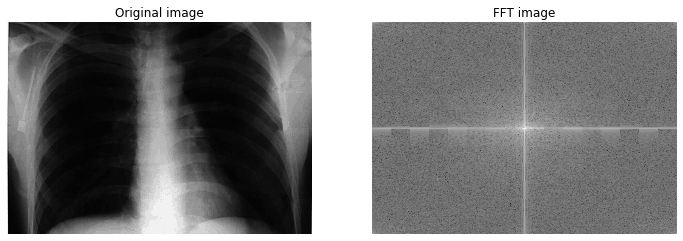

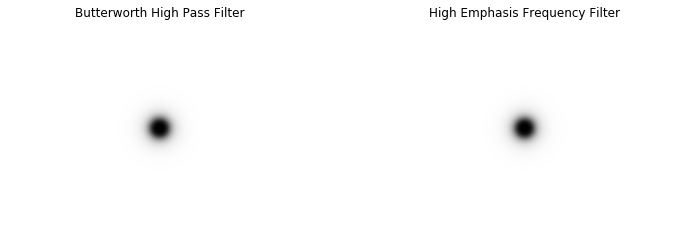

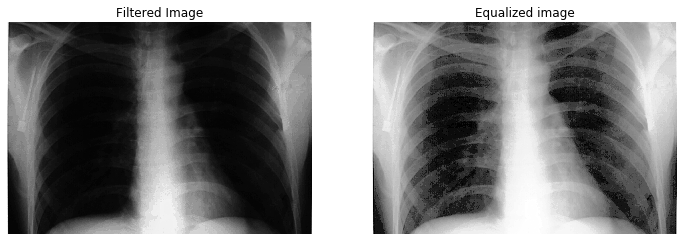

In [17]:
#------------------------------------------------------------------------------
main2()

### Problem 3

Color spaces. Write a function that converts an image from the RGB color
space to HSI color space. Write another function that converts an image from the HSI
color space to RGB color space. You should use the homework equations to implement these conversions.

When plotting images in the HSI space, you should plot each channel separately, using one image for the H channel, another for the S channel and another for the I channel.

Test your function converting images from RGB to HSI and back to RGB.

In [73]:
def imageRGB2HSI(image, normalized=False, huemode='deg'):
    HsiMat = np.empty(image.shape)
    # [R, G, B] = image/255.0
    if not normalized:
        image = image/255.0
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    # compute nump 
    Hnum = 0.5*(2 * R - G - B)
    Hden = np.sqrt(np.square((R - G)) + (R - B)*(G - B))
    Hden[Hden == 0] = np.finfo(Hden.dtype).eps # avoid division by zero
    Hmat = Hnum/Hden
    Hmat[Hmat > 1] = 1
    Hmat[Hmat < -1] = -1
    HsiMat[:,:,0] = np.where(G >= B, np.arccos(Hmat), 2*np.pi -  np.arccos(Hmat))
    # print(huemode)
    min_hue_value = np.pi/100
    if huemode == 'deg':
        min_hue_value = np.degrees(min_hue_value)
    HsiMat = np.where(np.abs(HsiMat) < min_hue_value, 0, HsiMat)
    if huemode == 'deg':
        HsiMat[:,:,0] = np.degrees(HsiMat[:,:,0])
    
    # compute s mat
    sumImage = np.sum(image, axis=2)
    sumImage[sumImage == 0] = 1
    HsiMat[:,:,1] = 1 - 3 * np.min(image, axis=2) / sumImage
    #compute i mat
    HsiMat[:,:,2] = np.average(image, axis=2)
    # combine mat
    return HsiMat 

In [19]:
def hsi255(image, huemode='deg'):
    hsiImage = image.copy()
    if huemode == 'deg':
        hsiImage[:,:,0] = hsiImage[:,:,0]/360.0
    elif huemode == 'rad':
        hsiImage[:,:,0] = hsiImage[:,:,0]/(2 * np.pi)
    hsiImage[:,:,0] = 255 * hsiImage[:,:,0]
    hsiImage[:,:,1] = 255 * hsiImage[:,:,1]
    hsiImage[:,:,2] = 255 * hsiImage[:,:,2]
    return hsiImage

In [66]:
def imageHSI2RGB(hsiImage, normalized=False, huemode='deg'):
    # hsiImage = image.copy()
    H = hsiImage[:,:,0].copy()
    S = hsiImage[:,:,1]
    I = hsiImage[:,:,2]
    
    if not normalized:
        I = 255 * I 
    
    if huemode == 'deg':
        H = np.radians(H)

    Hind, Hmod = np.divmod(H, 2 * np.pi / 3)

    M = I * (1 - S)
    X = I * (1 + S * np.cos(Hmod)/np.cos(np.pi/3 - Hmod))
    C = 3*I - (X + M)

    RMat = np.empty(hsiImage.shape[:2])
    GMat = np.empty(hsiImage.shape[:2])
    BMat = np.empty(hsiImage.shape[:2])
    
    indexed = np.where(Hind == 1)
    RMat[indexed] = M[indexed]
    GMat[indexed] = X[indexed]
    BMat[indexed] = C[indexed]
    
    indexed = np.where(Hind == 2)
    RMat[indexed] = C[indexed]
    GMat[indexed] = M[indexed]
    BMat[indexed] = X[indexed]

    indexed = np.where(Hind == 0)
    RMat[indexed] = X[indexed]
    GMat[indexed] = C[indexed]
    BMat[indexed] = M[indexed]
    
    if normalized:
        return np.dstack((RMat, GMat, BMat))
    return np.dstack((RMat, GMat, BMat)).astype(np.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


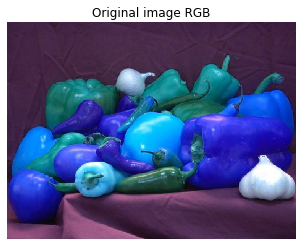

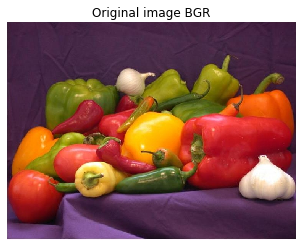

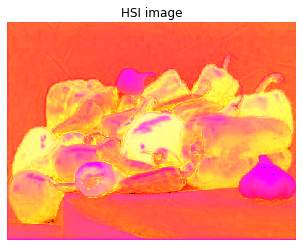

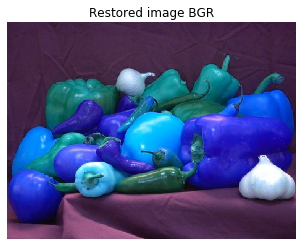

In [67]:
#-------------------------------------------------------------------------------
v = cv2.imread('files/rgb_image.jpg',cv2.IMREAD_COLOR)

plt.figure()
plt.imshow(v)
plt.title('Original image RGB')
plt.axis('off')

plt.figure()
plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
plt.title('Original image BGR')
plt.axis('off')

hsi = imageRGB2HSI(v, huemode='deg')

plt.figure()
plt.imshow(hsi)
plt.title('HSI image')
plt.axis('off')
plt.show()

original = imageHSI2RGB(hsi, huemode='deg')
plt.figure()
plt.imshow(original)
plt.title('Restored image BGR')
plt.axis('off')
plt.show()

# display = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
# plt.figure()
# plt.imshow(display)
# plt.title('Restored image BGR')
# plt.axis('off')
# plt.show()

### Problem 4

Manipulating color images. Write a function that converts a color image from the RGB to
the HSI color space, modifies the ‘I’ channel by applying histogram equalization, and revert
back the image to the RGB color space. Apply this function to enhance the image <tt>dark_fountain.jpg</tt>.

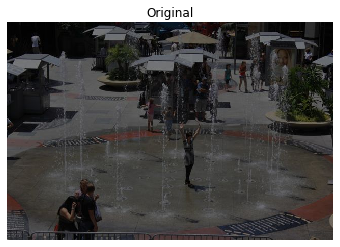

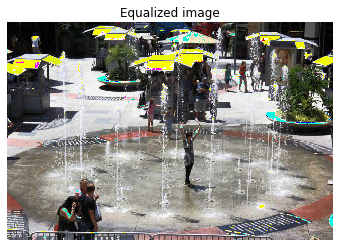

In [22]:
def equ_hist(image):
    # convert image to int
    img = image.astype('uint8')
    # https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img2 = cdf[img]
    return img2
#-------------------------------------------------------------------------------
def equ_intensity(image):
    hsi_image = imageRGB2HSI(image)
    intensity = 255 * hsi_image[:,:,2]
    hsi_image[:,:,2] = equ_hist(np.average(image, axis=2).astype(np.uint8))
    hsi_image[:,:,2] = hsi_image[:,:,2] / 255.0
    return imageHSI2RGB(hsi_image)
#-------------------------------------------------------------------------------    
def main4():
    filename = 'files/dark_fountain.jpg'
    img = cv2.imread(filename, 1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    equalized = equ_intensity(image)
    #
    plt.figure()
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')
    #
    plt.figure()
    plt.imshow(equalized)
    plt.title('Equalized image')
    plt.axis('off')
    plt.show()
#-------------------------------------------------------------------------------
main4()

### Problem 5 

Manipulating color images. Consider the RGB color image <tt>squares.jpg</tt>, where the
squares are pure red, green and blue.

<img src="files/squares.jpg" width=200 />

1. Convert this image to the HSI color space. Blur the H component of the image using a 25x25 averaging mask, and convert it back to RGB. How do you explain the obtained result?
2. Repeat, blurring only the saturation component this time. How do you explain the result?


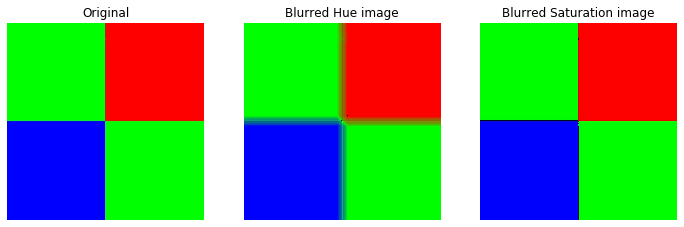

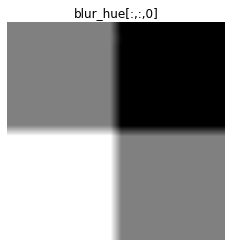

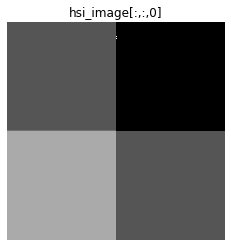

[6.41996260e-15 6.41996260e-15 6.41996260e-15 6.41996260e-15
 6.41996260e-15 6.41996260e-15 6.41996260e-15 6.41996260e-15
 6.41996260e-15 6.41996260e-15 6.41996260e-15 6.41996260e-15
 6.41996260e-15 6.41996260e-15 6.41996260e-15 6.41996260e-15
 6.41996260e-15 6.41996260e-15 6.41996260e-15 6.41996260e-15
 6.22736372e-15 6.03476484e-15 6.03476484e-15 6.03476484e-15
 6.03476484e-15 5.84216597e-15 6.16316410e-15 6.48416223e-15
 6.80516036e-15 7.12615849e-15 7.12615849e-15 7.12615849e-15
 7.12615849e-15 7.12615849e-15 6.93355961e-15 6.74096073e-15
 6.74096073e-15 6.74096073e-15 6.74096073e-15 6.74096073e-15
 6.74096073e-15 6.74096073e-15 6.74096073e-15 6.74096073e-15
 6.74096073e-15 6.93355961e-15 7.12615849e-15 7.12615849e-15
 7.12615849e-15 7.12615849e-15 7.31875736e-15 6.99775923e-15
 6.67676110e-15 6.35576297e-15 6.03476484e-15 6.03476484e-15
 6.03476484e-15 6.03476484e-15 6.03476484e-15 6.22736372e-15
 6.41996260e-15 6.41996260e-15 6.41996260e-15 6.41996260e-15
 6.41996260e-15 6.419962

In [74]:
#-------------------------------------------------------------------------------
def blurred_image_hue_sat(image):
    hsi_image = imageRGB2HSI(image)
    #
    plt.figure(figsize=(12,15))
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')
    #
    blur_hue = hsi_image.copy()
    blur_hue[:,:,0] = cv2.blur(255.0 * blur_hue[:,:,0] / 360.0,(25, 25)) * 360.0 / 255.0
    restored_hue = imageHSI2RGB(blur_hue)
    #
    plt.subplot(1,3,2)
    # plt.imshow()
    plt.imshow(restored_hue)
    plt.title('Blurred Hue image')
    plt.axis('off')
    #
    blur_sat = hsi_image.copy()
    blur_sat[:,:,1] = cv2.blur(blur_sat[:,:,1],(25, 25))
    restored_sat = imageHSI2RGB(blur_sat) 
    #
    plt.subplot(1,3,3)
    plt.imshow(restored_sat)
    plt.title('Blurred Saturation image')
    plt.axis('off') 
    plt.show()

#-------------------------------------------------------------------------------
def main5():
    filename = 'files/squares.jpg'
    image = cv2.cvtColor(cv2.imread(filename, 1), cv2.COLOR_BGR2RGB)
    blurred_image_hue_sat(image)
#-------------------------------------------------------------------------------
main5()

## Problem 6

False color. Write a Python function that produces a false color visualization of
the input gray-scale image as follows:

1. If the intensity of an input pixel is lower than a threshold $T$, then the color of the corresponding pixel should be blue.
2. If the intensity of an input pixel is larger or equal than a threshold $T$, then the color of the corresponding pixel should be yellow.

Use your function to reproduce the following result on the image <tt>weld_x-ray.jpg</tt>:

<img src="files/weld_x-ray.jpg" width=200 /> <img src="files/Fig6.21(b).jpg" width=200 /> 

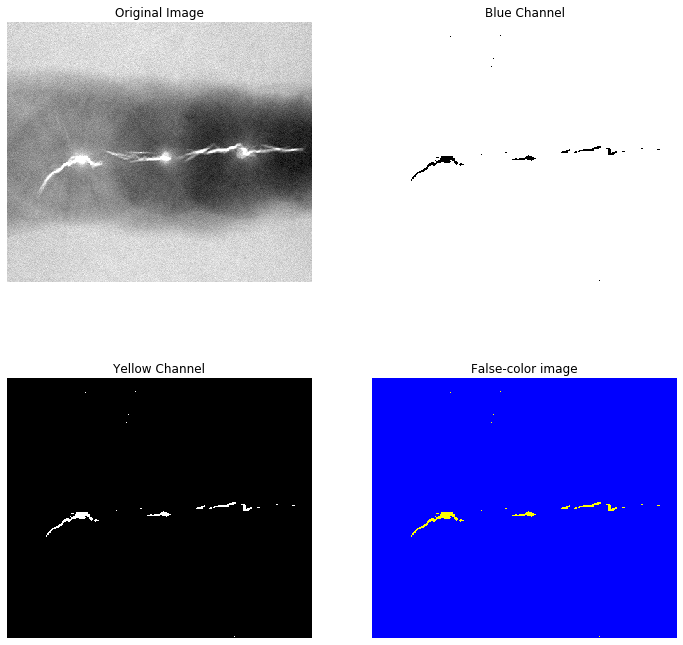

In [47]:
#-------------------------------------------------------------------------------
def false_color(image,T):
    height, width = image.shape[0], image.shape[1]
    out = np.zeros((height,width,3), np.uint8)
    _, img_blue = cv2.threshold(image, T, 255, cv2.THRESH_BINARY_INV)
    img_yellow = 255 - img_blue     
    out[:,:,0] = img_blue; out[:,:,1] = img_yellow; out[:,:,2] = img_yellow;
    return out, img_blue, img_yellow
#-------------------------------------------------------------------------------
def main6(): 
    img = cv2.imread("files/weld_x-ray.jpg", cv2.IMREAD_GRAYSCALE)
    img_out, blue_channel, yellow_channel = false_color(img, 250)
    plt.figure(figsize = (12, 12))
    plt.subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Original Image')
    plt.subplot(2,2,2)
    plt.imshow(blue_channel, cmap='gray')
    plt.axis('off')
    plt.title('Blue Channel')
    plt.subplot(2,2,3)
    plt.imshow(yellow_channel, cmap='gray')
    plt.axis('off')
    plt.title('Yellow Channel')
    plt.subplot(2,2,4)
    plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('False-color image')
#-------------------------------------------------------------------------------
main6()

### Result:
To achieve the above result it's necessary to do a image thresholding and then to assign colors to the binary image. As you can see the image weld_x-ray.jpg is a grayscale image, where the most important pixel values are near to white value (255), so we need to white pixels will be converted to yellow pixels and the others will be blue. 

Before to explain the proccess, it's necessary to clarify that when a binary image is converted to a RGB image, we need to create an array with size of the original image and 3 color channels, so the array is created using function **np.zeros((height,width,3), np.uint8)** . In each channel, for this example blue channel, if the value of pixel is 255 color will be blue.

So first it's applied a thresholding using function **cv2.threshold(image, T, 255, cv2.THRESH_BINARY_INV)**. The argument **cv2.THRESH_BINARY_INV** make that pixel values below T will be white and the values above will be black, and the result is assigned to variable **img_blue**. 

Second, we need negative of **img_blue** for yellow channel, which is obtained substracting 255 to **img_blue** and then assigned to variable **img_yellow**.

Finally, channel are assigned in variable **out** and printed.

## Problem 7

Green screen effects. Write a function that replaces the green background of the image <tt>hiro.jpg</tt> with a background image of your choice.

<img src="files/hiro.jpg" width=300>

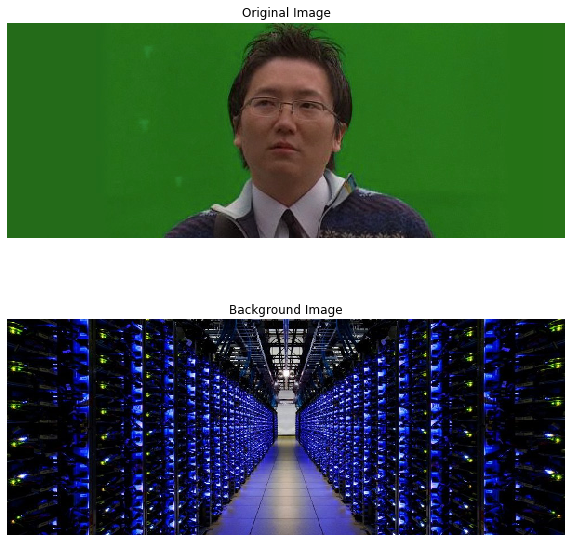

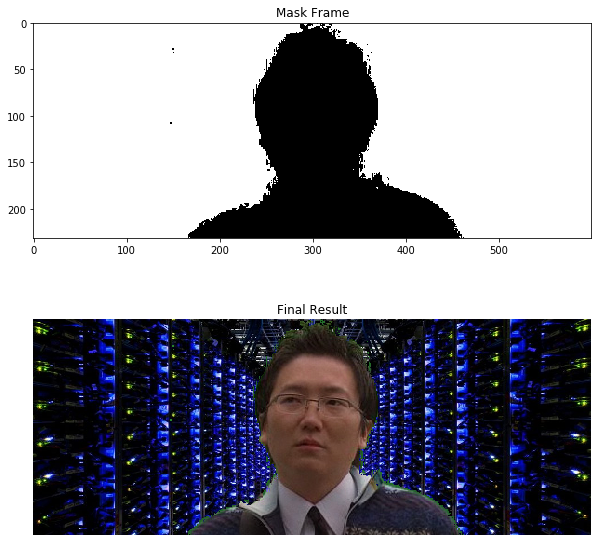

In [25]:
#-------------------------------------------------------------------------------
def main7(): 
    # load hiro and datecenter image 
    img = cv2.imread('files/hiro.jpg',cv2.IMREAD_COLOR)
    img_bkg = cv2.imread('files/datacenter.jpg',cv2.IMREAD_COLOR)
    # take dimentions from Hiro's image
    heigh, width = img.shape[:2] 
    # resize dimentions to datacenter image 
    img_bkg = cv2.resize(img_bkg,(width, heigh), interpolation = cv2.INTER_CUBIC)
    # Converts an image from one color space to HSV format.
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_bkg_hsv = cv2.cvtColor(img_bkg, cv2.COLOR_BGR2HSV)
    # define range of green color in HSV
    lower_green = np.array([50, 10, 50]) 
    upper_green = np.array([60, 255, 255]) 
    # Threshold the HSV image to get only green colors 
    green_mask = cv2.inRange(img_hsv, lower_green, upper_green) #
    # Threshold the HSV image to get only green colors
    img_fg = cv2.bitwise_and(img_hsv, img_hsv, mask= 255 - green_mask)
    # Threshold the HSV image to get only colors differents to green 
    img_bg = cv2.bitwise_and(img_bkg_hsv, img_bkg_hsv, mask = green_mask)
    # Add the images 
    img_out = cv2.add(img_fg, img_bg)
    # Show orignal image
    plt.figure(figsize=(10, 10))
    plt.subplot(2,1,1)
    plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)); 
    plt.axis('off');
    plt.title('Original Image')
    # display background image
    plt.subplot(2,1,2)
    plt.imshow(cv2.cvtColor(img_bkg, cv2.COLOR_BGR2RGB)); 
    plt.axis('off');
    plt.title('Background Image')
    # Show mask
    plt.figure(figsize=(10, 10))
    plt.subplot(2,1,1)
    plt.imshow(green_mask, cmap = 'gray');
    plt.title('Mask Frame')
    # Display final result
    plt.subplot(2,1,2)
    plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_HSV2RGB)); 
    plt.axis('off')
    plt.title('Final Result')
    plt.show()
#-------------------------------------------------------------------------------    
main7() 

### Result:

Before to change the green background, foreground and background image must be of the same size, so first of all we need to resize any of them. In this case, the background image is resized using the function **cv2.resize()**.

Each image is converted to HSV format using the function **cv2.cvtColor(img, cv2.COLOR_BGR2HSV)**, the reason is HSV format offer more information than RGB format, such as saturation **S** and the value of  lightness **V**.

After this, it's necessary make the mask. First, green range is established with the values of **lower_green** and **upper_green**. The second step is doing a image thesholding to HSV image using the function **cv2.inRange(img_hsv, lower_green, upper_green)**, in this function green pixels of *hiro.jpg*  will be assigned the value of 255(white) and the others will be assigned the value of 1. The result is assigned to **green_mask**.

Following the process, due to images are binary matrix, **cv2.bitwise_and()** is used to do an *AND* operation between the foreground or background image and the **green_mask**. For **img_fg**,  mask is *255 - green_mask* because we need to catch the pixels of hiro, and these pixels inicially have a value of 1 and not 255 as we want.

Finally, **img_fg** is added with **img_bkg** using cv2.add() for create the final image.